In [1]:
import os

import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = 'raise'  # forbid chained assignment to prevent implicit errors

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 6)  # set default figure size

import seaborn as sns
sns.set(font_scale=1.1)  # increase default font scale and set seaborn's plot style

from typing import List, Iterable

In [2]:
#data_root_dp = os.path.join('D', 'Users', 'data', 'soccer')  # change to yours path
#print(f'data_root_dp: "{data_root_dp}"')

In [3]:
import sqlite3

# open connection to .sqlite file
data_sql_fp = os.path.join('database.sqlite')
print(f'will read from: "{data_sql_fp}"')
con = sqlite3.connect(data_sql_fp)

df = pd.read_sql('select * from Player_Attributes', con)  # run SQL-query
print(f'shape: {df.shape}')
con.close()  # close connection to .sqlite file

# save to .csv
out_fp = os.path.join('tmp', 'player_attributes.csv')
os.makedirs(os.path.dirname(out_fp), exist_ok=True)  # create directories if needed
print(f'will save to: "{out_fp}"')
df.to_csv(out_fp, index=False)

will read from: "database.sqlite"
shape: (183978, 42)
will save to: "tmp\player_attributes.csv"


In [4]:
data_player_attributes_fp = os.path.join('tmp\player_attributes.csv')
print(f'reading from: "{data_player_attributes_fp}"')
df = pd.read_csv(data_player_attributes_fp)
print(df.shape)

reading from: "tmp\player_attributes.csv"
(183978, 42)


In [5]:
df.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [6]:
# there are 3 'id' columns in data. 
# we will use 'player_api_id' only
# and drop other 'id' columns.
redundant_key_columns = ['id', 'player_fifa_api_id']

# also we will drop categorical columns for this task.
categorical_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

cols_to_drop = redundant_key_columns + categorical_columns
print(f'will drop following columns: {cols_to_drop}')
df.drop(columns=cols_to_drop, inplace=True)

# rename 'player_api_id' column to shorter one: 'id'.
df.rename(columns={'player_api_id': 'id'}, inplace=True)

# cast string values to datetime
df['date'] = pd.to_datetime(df['date'])

# drop records that contain only NaNs in features
all_features = set(df.columns).difference(['id', 'date'])  # all columns without key columns
df.dropna(subset=all_features, how='all', inplace=True)

print(f'df.shape: {df.shape}')

will drop following columns: ['id', 'player_fifa_api_id', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
df.shape: (183142, 37)


In [7]:
# the dataset we're working with migh get updated in future (new records might be added).
# thus we remove any records with date larger than the current max date in data (2016-07-07)
# for compatibility with current version of notebook.
df.drop(index=df[df['date'] > '2016-07-07'].index, inplace=True)
print(df.shape)

(183142, 37)


In [8]:
df.duplicated(['id', 'date']).value_counts()

False    183142
dtype: int64

In [9]:
df.duplicated('id').value_counts()

True     172082
False     11060
dtype: int64

In [10]:
df.shape

(183142, 37)

# Task 1

In [11]:
w = df.groupby('id').max()
df = w

In [12]:
df.index = [i for i in range(len(df))]
print(df.shape)

(11060, 36)


In [13]:
df

,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2015-01-16,63.0,64.0,52.0,48.0,47.0,64.0,39.0,57.0,51.0,51.0,67.0,62.0,67.0,64.0,74.0,52.0,76.0,71.0,63.0,78.0,56.0,59.0,72.0,71.0,55.0,56.0,69.0,64.0,66.0,63.0,14.0,24.0,67.0,24.0,24.0
1,2015-10-16,72.0,72.0,39.0,40.0,83.0,59.0,23.0,46.0,33.0,25.0,61.0,57.0,58.0,61.0,53.0,64.0,60.0,60.0,69.0,66.0,85.0,25.0,84.0,77.0,34.0,55.0,38.0,75.0,74.0,68.0,12.0,7.0,8.0,10.0,16.0
2,2016-03-17,75.0,75.0,44.0,45.0,72.0,75.0,31.0,44.0,53.0,25.0,60.0,63.0,68.0,71.0,60.0,77.0,61.0,41.0,79.0,81.0,72.0,25.0,66.0,81.0,72.0,60.0,63.0,78.0,77.0,82.0,12.0,21.0,56.0,21.0,21.0
3,2013-07-05,74.0,81.0,64.0,73.0,73.0,77.0,69.0,82.0,84.0,73.0,83.0,83.0,68.0,72.0,65.0,69.0,65.0,74.0,62.0,62.0,68.0,81.0,64.0,60.0,72.0,73.0,72.0,39.0,48.0,25.0,12.0,21.0,83.0,21.0,21.0
4,2010-08-30,73.0,77.0,78.0,40.0,58.0,75.0,43.0,66.0,67.0,56.0,73.0,68.0,72.0,74.0,65.0,74.0,67.0,49.0,61.0,76.0,73.0,45.0,74.0,70.0,62.0,60.0,68.0,79.0,78.0,69.0,8.0,21.0,73.0,21.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,2016-06-09,53.0,67.0,43.0,45.0,48.0,60.0,43.0,57.0,47.0,44.0,59.0,56.0,66.0,64.0,61.0,54.0,74.0,51.0,63.0,54.0,51.0,39.0,37.0,23.0,49.0,52.0,53.0,40.0,49.0,50.0,9.0,14.0,13.0,12.0,9.0
11056,2016-05-12,59.0,66.0,55.0,28.0,50.0,35.0,29.0,67.0,37.0,39.0,35.0,55.0,77.0,76.0,70.0,60.0,74.0,29.0,55.0,63.0,46.0,27.0,59.0,53.0,55.0,40.0,43.0,55.0,69.0,62.0,7.0,10.0,7.0,9.0,9.0
11057,2016-05-12,58.0,68.0,48.0,26.0,57.0,49.0,24.0,41.0,39.0,20.0,41.0,42.0,64.0,68.0,50.0,48.0,52.0,46.0,68.0,50.0,67.0,25.0,52.0,55.0,38.0,36.0,45.0,63.0,69.0,68.0,8.0,8.0,12.0,12.0,6.0
11058,2016-04-14,60.0,74.0,35.0,57.0,55.0,60.0,52.0,63.0,56.0,37.0,54.0,59.0,79.0,76.0,66.0,61.0,78.0,57.0,58.0,57.0,46.0,50.0,34.0,13.0,59.0,58.0,61.0,18.0,19.0,21.0,9.0,10.0,8.0,10.0,11.0


In [14]:
df.drop(columns=['date'], inplace=True)

In [15]:
df.isna().sum()

overall_rating          0
potential               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys               478
dribbling               0
curve                 478
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility               478
reactions               0
balance               478
shot_power              0
jumping               478
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision                478
penalties               0
marking                 0
standing_tackle         0
sliding_tackle        478
gk_diving               0
gk_handling             0
gk_kicking              0
gk_positioning          0
gk_reflexes             0
dtype: int64

In [16]:
df.isna().sum(axis=1).value_counts()

0    10582
7      478
dtype: int64

# Task 2

In [17]:
df = df.dropna()

In [18]:
assert df.isna().sum().sum() == 0

# Task 3

In [58]:
def mse(*, y_true, y_pred):
    return ((y_true - y_pred)**2).mean()
    
def mae(*, y_true, y_pred):
    return (abs(y_true - y_pred)).mean()
    
def mape(*, y_true, y_pred):
    eps = np.finfo(np.float64).eps
    return (np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), eps)).mean()
    
def r2(*, y_true, y_pred):
    if sum((y_true - y_pred)**2) != 0 and sum((y_true - y_true.mean())**2) != 0:
        return 1 - (sum((y_true - y_pred)**2) / sum((y_true - y_true.mean())**2))
    elif sum((y_true - y_pred)**2) != 0 and sum((y_true - y_true.mean())**2) == 0:
        return 0
    else:
        return 1


In [59]:
from sklearn.metrics import (
    mean_squared_error as mse_lib, 
    mean_absolute_error as mae_lib,
    mean_absolute_percentage_error as mape_lib,
    r2_score as r2_lib
)

In [60]:
def compare_metrics(fn, fn_lib, y_true, y_pred, n_digits=9):
    """ Print and compare values of custom and library functions using given precision. """
    m_fn = fn(y_true=y_true, y_pred=y_pred)
    m_fn_lib = fn_lib(y_true=y_true, y_pred=y_pred)
    print(f'{fn.__name__} custom : {m_fn}')
    print(f'{fn.__name__} library: {m_fn_lib}')
    print()
    assert round(m_fn, n_digits) == round(m_fn_lib, n_digits)

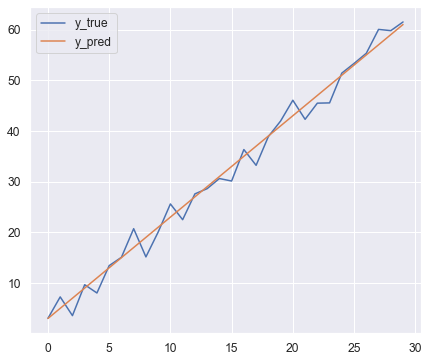

In [61]:
n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_pred = 2 * x + 3

plt.plot(x, y_true, label='y_true')
plt.plot(x, y_pred, label='y_pred')
plt.legend();

In [62]:
compare_metrics(mse, mse_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mae, mae_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mape, mape_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('all tests passed')

mse custom : 4.547305218420911
mse library: 4.547305218420911

mae custom : 1.668110063459578
mae library: 1.668110063459578

mape custom : 0.10349900717456632
mape library: 0.10349900717456632

r2 custom : 0.9853710310764321
r2 library: 0.9853710310764321

all tests passed


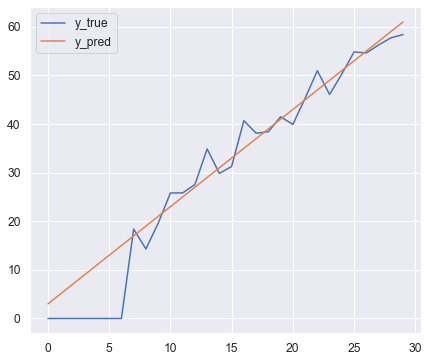

In [63]:
n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_true[:7] = 0
y_pred = 2 * x + 3

plt.plot(x, y_true, label='y_true')
plt.plot(x, y_pred, label='y_pred')
plt.legend();

In [64]:
compare_metrics(mse, mse_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mae, mae_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(mape, mape_lib, y_true=y_true, y_pred=y_pred)
compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('all tests passed')

mse custom : 27.785724528841623
mse library: 27.785724528841623

mae custom : 3.636586764847831
mae library: 3.636586764847831

mape custom : 9457559217478042.0
mape library: 9457559217478042.0

r2 custom : 0.9315077269433432
r2 library: 0.9315077269433432

all tests passed


In [65]:
# constant target value

n = 30
x = np.arange(n)
y_true = np.repeat(15, n)
y_pred = 2 * x + 3

compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('success')

r2 custom : 0
r2 library: 0.0

success


In [66]:
# perfect fit

n = 30
x = np.arange(n)
y_true = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=n)
y_pred = y_true

compare_metrics(r2, r2_lib, y_true=y_true, y_pred=y_pred)
print('success')

r2 custom : 1
r2 library: 1.0

success


In [67]:
def get_metrics(*, y_true, y_pred) -> pd.Series:
    """ A helper function to return all metrics for given labels and predictions. """
    
    # if you didn't implement some metrics, comment them out for this function to work.
    return pd.Series({
        'mse': mse(y_true=y_true, y_pred=y_pred),
        'mae': mae(y_true=y_true, y_pred=y_pred),
        'mape': mape(y_true=y_true, y_pred=y_pred),
        'r2': r2(y_true=y_true, y_pred=y_pred),
    })

In [68]:
def fit_and_evaluate(model, x_train, y_train, x_test, y_test) -> pd.DataFrame:
    """ 
    A helper function to: 
    * fit a passed model
    * and return metrics on train and test sets.
    """
    # fit the model
    model.fit(x_train, y_train)
    
    # return metrics as pd.DataFrame
    m = pd.DataFrame([
        get_metrics(y_true=y_train, y_pred=model.predict(x_train)),  # metrics for train set
        get_metrics(y_true=y_test, y_pred=model.predict(x_test))     # metrics for test set
    ], index=['train', 'test']
    )
    
    return m

In [69]:
print(df.shape)
ix_split = int(0.8 * df.shape[0])
DF_TRAIN = df.iloc[:ix_split].copy()
DF_TEST = df.iloc[ix_split:].copy()
print(DF_TRAIN.shape, DF_TEST.shape)

(10582, 35)
(8465, 35) (2117, 35)


In [70]:
def get_train_test_data(features: List[str], target: str) -> tuple:
    """
    Return x_train, y_train, x_test, y_test using 
    * global train/test split 
    * features and target provided.
    """
    # in general, it's a bad practice to use global variables. 
    # however, we use it here with caution for simplicity.
    return (
        DF_TRAIN[features].copy(), DF_TRAIN[target].copy(), 
        DF_TEST[features].copy(), DF_TEST[target].copy()
    )

In [71]:
target = 'dribbling'
features = ['short_passing']
x_train, y_train, x_test, y_test = get_train_test_data(features, target)

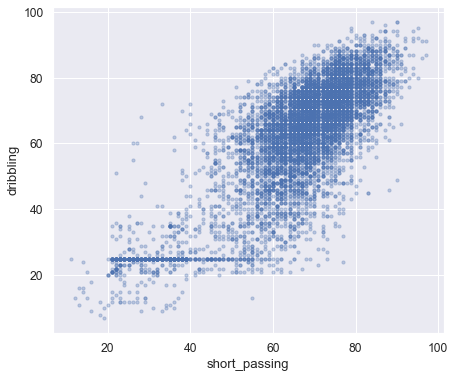

In [72]:
plt.scatter(x=x_train, y=y_train, alpha=0.3, s=10);
plt.xlabel('short_passing');
plt.ylabel('dribbling');

# Task 4

In [108]:
df['dribbling'].corr(df['short_passing'])

0.7922400120793763

# Task 5

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train);

In [111]:
model_intercept = model.intercept_
model_slope = model.coef_[0]
print(f'model_intercept: {model_intercept}')
print(f'model_slope: {model_slope}')

model_intercept: -1.7718199194858002
model_slope: 0.9723308740554681


In [112]:
model_preds = model.predict(x_test)
model_preds

array([58.51269427, 60.45735602, 58.51269427, ..., 45.87239291,
       56.56803252, 56.56803252])

In [113]:
print('model metrics on test set')
metrics_test_1 = get_metrics(y_true=y_test, y_pred=model_preds)
metrics_test_1

model metrics on test set


mse     109.758906
mae       8.343618
mape      0.156706
r2        0.530543
dtype: float64

In [114]:
model_manual_preds = model_intercept + model_slope * x_test

In [116]:
assert isinstance(model_manual_preds, pd.DataFrame)

In [117]:
assert np.allclose(model_preds, model_manual_preds.iloc[:, 0].to_numpy())
print('success')

success


# Task 6

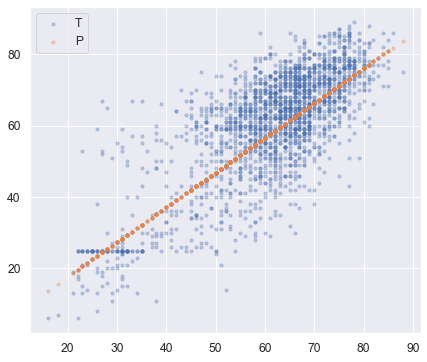

In [122]:
plt.scatter(x=x_test, y=y_test, alpha=0.3, s=10)
plt.scatter(x=x_test, y=model_manual_preds, alpha=0.3, s=10)
plt.legend('TP');